In [1]:
import random
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.evolution_functions import next_generation, plot_n_pt, plot_pt_qt, plot_n_pt_qt, plot_n_p2_q2_pq

# Implementação 1

1. Avaliar os efeitos nas frequências gênicas de uma
população muito grande com mutação recorrente
unidirecional para um loco com dois alelos

2. Simular diferentes valores iniciais de p

3. Simular com u = 1.0e-4
    - Simular 5 ordens de grandeza diferentes para
valores de u

Responder e demonstrar:

- Ocorre estagnação? Se sim, em quantas gerações?

- Ocorre perda da variabilidade genética? Se sim, em
quantas gerações?

- Mesmo agindo isoladamente, e em uma taxa
pequena, a mutação causou alteração significativa
nas frequências?

- A população está em EHW? Até quantas gerações?
    * Como testar o EHW?

Responder às perguntas (variar u, p, etc)

* Teste do CHI² para os valores das frequências dos
genótipos observados e esperados (segundo o EHW)

* Gráficos
    - p, q pela geração T
    - frequência de AA, AB, BB pela geração T
    - CHI² pela geração T

 p inicial, 0.5, q inicial, 0.5
Final p: 0.45241913881487644, Final q: 0.5475808611837709
 p inicial, 0.9090909090909091, q inicial, 0.09090909090909091
Final p: 0.822580252390677, Final q: 0.17741974760684165
 p inicial, 0.9900990099009901, q inicial, 0.009900990099009901
Final p: 0.8958794828017025, Final q: 0.10412051719557042
 p inicial, 0.999000999000999, q inicial, 0.000999000999000999
Final p: 0.9039343432864586, Final q: 0.09606565671081796
 p inicial, 0.9999000099990001, q inicial, 9.999000099990002e-05
Final p: 0.9047478028494554, Final q: 0.09525219714781502


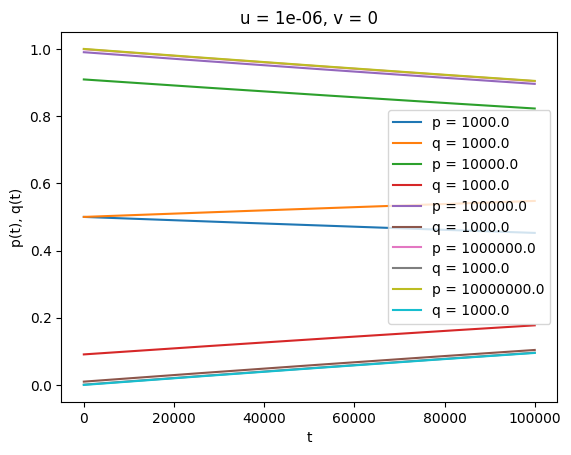

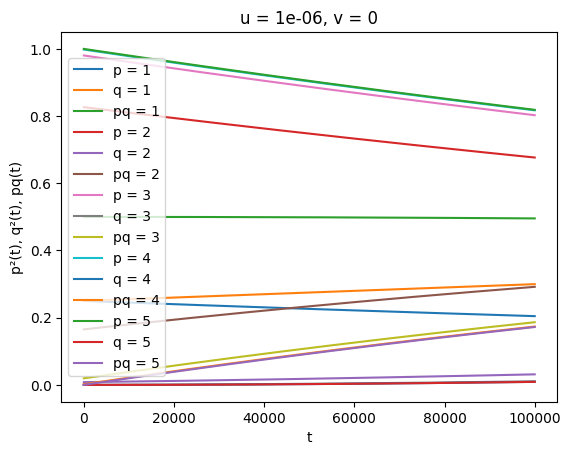

 p inicial, 0.5, q inicial, 0.5
Final p: 0.18394064029052698, Final q: 0.8160593597109008
 p inicial, 0.9090909090909091, q inicial, 0.09090909090909091
Final p: 0.3344375278009508, Final q: 0.6655624722016539
 p inicial, 0.9900990099009901, q inicial, 0.009900990099009901
Final p: 0.36423889166440865, Final q: 0.6357611083384285
 p inicial, 0.999000999000999, q inicial, 0.000999000999000999
Final p: 0.36751376681424364, Final q: 0.6324862331886532
 p inicial, 0.9999000099990001, q inicial, 9.999000099990002e-05
Final p: 0.367844496131433, Final q: 0.6321555038714408


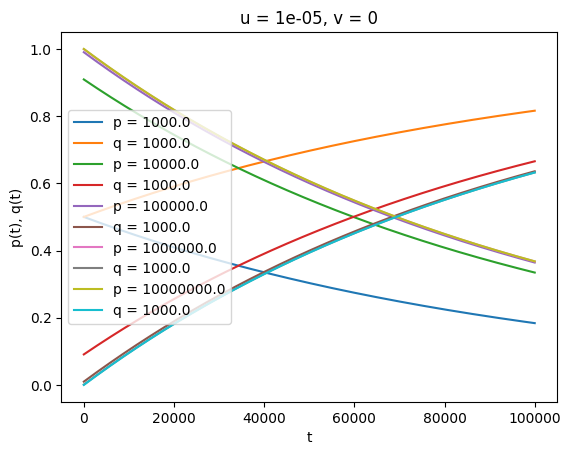

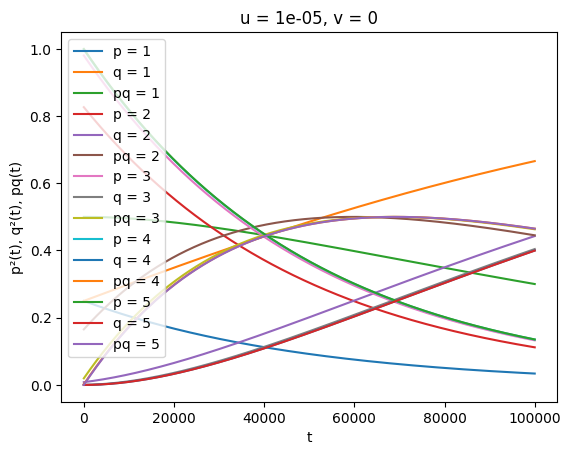

 p inicial, 0.5, q inicial, 0.5
Final p: 2.2690886068111625e-05, Final q: 0.9999773091139983
 p inicial, 0.9090909090909091, q inicial, 0.09090909090909091
Final p: 4.125615648747728e-05, Final q: 0.9999587438436146
 p inicial, 0.9900990099009901, q inicial, 0.009900990099009901
Final p: 4.493244765962854e-05, Final q: 0.9999550675524372
 p inicial, 0.999000999000999, q inicial, 0.000999000999000999
Final p: 4.53364357005253e-05, Final q: 0.9999546635644269
 p inicial, 0.9999000099990001, q inicial, 9.999000099990002e-05
Final p: 4.537723441278494e-05, Final q: 0.999954622765695


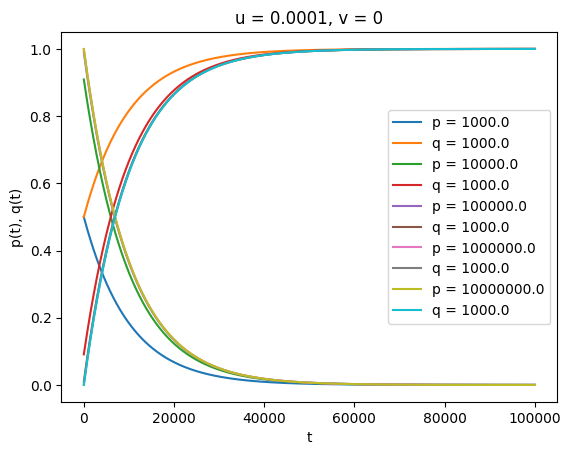

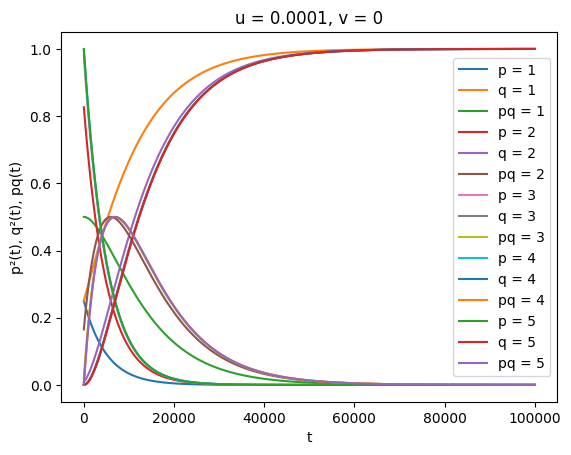

 p inicial, 0.5, q inicial, 0.5
Final p: 1.7710348790506176e-44, Final q: 0.9999999999999607
 p inicial, 0.9090909090909091, q inicial, 0.09090909090909091
Final p: 3.220063416455645e-44, Final q: 0.9999999999999601
 p inicial, 0.9900990099009901, q inicial, 0.009900990099009901
Final p: 3.506999760496309e-44, Final q: 0.9999999999999593
 p inicial, 0.999000999000999, q inicial, 0.000999000999000999
Final p: 3.538531226874383e-44, Final q: 0.9999999999999583
 p inicial, 0.9999000099990001, q inicial, 9.999000099990002e-05
Final p: 3.541715586542503e-44, Final q: 0.99999999999997


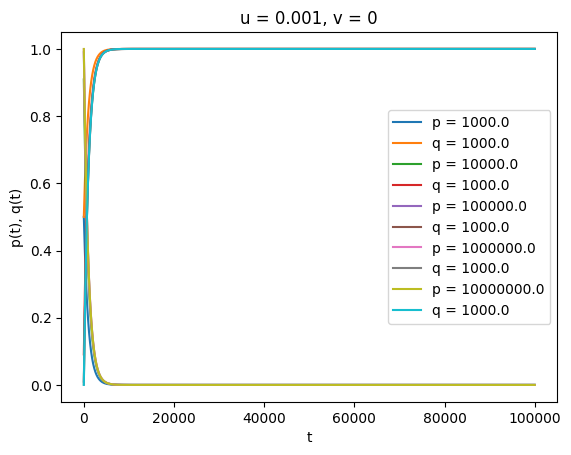

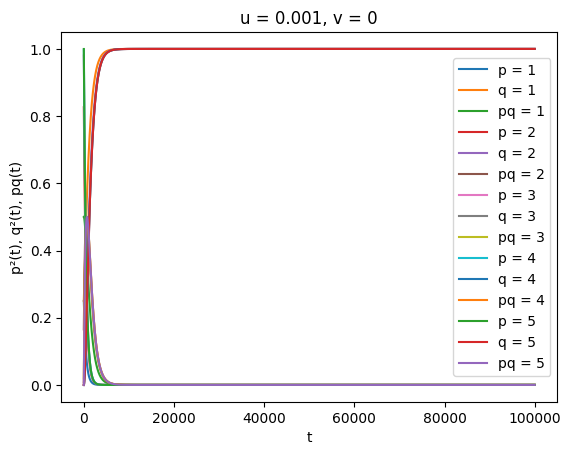

 p inicial, 0.5, q inicial, 0.5
Final p: 2.4e-322, Final q: 0.9999999999999962
 p inicial, 0.9090909090909091, q inicial, 0.09090909090909091
Final p: 2.4e-322, Final q: 0.9999999999999953
 p inicial, 0.9900990099009901, q inicial, 0.009900990099009901
Final p: 2.4e-322, Final q: 0.9999999999999949
 p inicial, 0.999000999000999, q inicial, 0.000999000999000999
Final p: 2.4e-322, Final q: 0.9999999999999968
 p inicial, 0.9999000099990001, q inicial, 9.999000099990002e-05
Final p: 2.4e-322, Final q: 0.9999999999999925


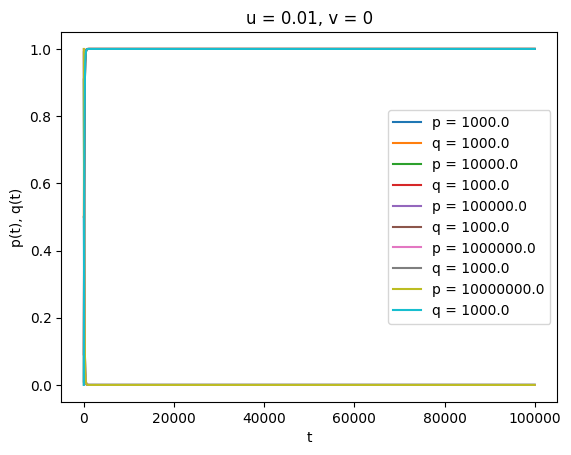

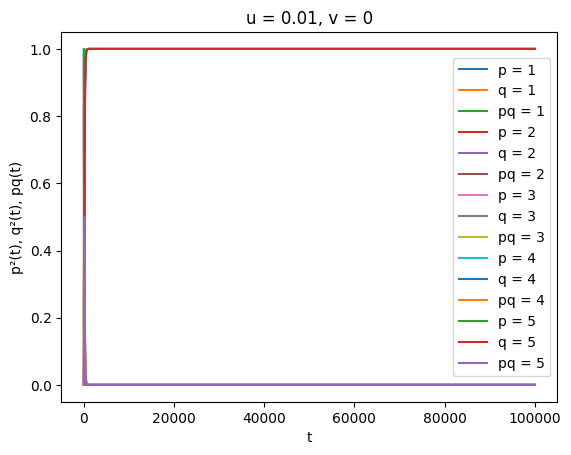

In [5]:
u_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
p0_list = [1e3, 1e4, 1e5, 1e6, 1e7]
# q0_list = [p - (p * 0.7 * random.randint(0, 1)) for p in p0_list]
q0_list = [1e3] * len(p0_list)
# v_list = [1e-4, 1e-3, 1e-2, 1e-1]

# u = 1e-4
v = 0
# p0 = 1e6
# q0 = 1e4
t = np.arange(100000)

estag_gens = {}
eq_gens = {}
gen_loss = {}

for u in u_list:
    p_t_list = []
    q_t_list = []
    p2_t_list = []
    q2_t_list = []
    pq_t_list = []
    for k, p0 in enumerate(p0_list):
        q0 = q0_list[k]
        N = (p0 + q0)
        p0 = p0/N
        q0 = q0/N

        p_t = [p0]
        q_t = [q0]
        p2_t = [p0 ** 2]
        q2_t = [q0 ** 2]
        pq_t = [2 * p0 * q0]

        dict_key = f"u={u} Pop={p0 * N}"
        print(f" p inicial, {p0}, q inicial, {q0}")
        for i in t:
            if i == 0:
                continue

            p, q = next_generation(p_t[i-1], q_t[i-1], u, v)

            if int(p*N) == int(q*N) and not eq_gens.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                eq_gens[dict_key] = i
            
            if p == p_t[i-1] and not estag_gens.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                estag_gens[dict_key] = i
            
            
            p2 = p ** 2
            q2 = q ** 2
            pq = 2 * p * q
            
            # Verify genetic loss
            # Perguntar ao professor se posso utilizar pq próximo de 0
            if int(pq * N) == 0 and not gen_loss.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                gen_loss[dict_key] = i
            
            # Add chi squared

            # print(f"Gen {i} p: {p} q: {q}")
            p_t.append(p)
            q_t.append(q)
            p2_t.append(p2)
            q2_t.append(q2)
            pq_t.append(pq)
        
        p_t_list.append(p_t)
        q_t_list.append(q_t)
        p2_t_list.append(p2_t)
        q2_t_list.append(q2_t)
        pq_t_list.append(pq_t)


        print(f"Final p: {p_t[-1]}, Final q: {q_t[-1]}")
    # plot_n_pt(t, p_t_list, p0_list, u, v)

    plot_n_pt_qt(t, p_t_list, q_t_list, p0_list, q0_list, u, v)
    plot_n_p2_q2_pq(t, p2_t_list, q2_t_list, pq_t_list, p0_list, q0_list, u, v)

    # plot_pt(t, p_t, p0)
    # plot_pt(t, q_t, q0)

    # plot_pt_qt(t, p_t, q_t, p0, q0)


In [6]:
print("Estagnação")
for key, value in estag_gens.items():
    print(f"Estag Gen {key}: {value}")

print("Equilibrio")
for key, value in eq_gens.items():
    print(f"Eq Gen {key}: {value}")

print("Perda Genética")
for key, value in gen_loss.items():
    print(f"Gen Loss {key}: {value}")

Estagnação
Estag Gen u=0.01 Pop=1000.0: 73603
Estag Gen u=0.01 Pop=10000.0: 73662
Estag Gen u=0.01 Pop=100000.0: 73671
Estag Gen u=0.01 Pop=1000000.0: 73672
Estag Gen u=0.01 Pop=10000000.0: 73672
Equilibrio
Perda Genética
Gen Loss u=0.0001 Pop=1000.0: 76003
Gen Loss u=0.0001 Pop=10000.0: 99030
Gen Loss u=0.001 Pop=1000.0: 7597
Gen Loss u=0.001 Pop=10000.0: 9899
Gen Loss u=0.001 Pop=100000.0: 12200
Gen Loss u=0.001 Pop=1000000.0: 14502
Gen Loss u=0.001 Pop=10000000.0: 16803
Gen Loss u=0.01 Pop=1000.0: 757
Gen Loss u=0.01 Pop=10000.0: 986
Gen Loss u=0.01 Pop=100000.0: 1215
Gen Loss u=0.01 Pop=1000000.0: 1444
Gen Loss u=0.01 Pop=10000000.0: 1673


In [15]:
estag_gens

{'u=0.001 Pop=1000.0': 737049,
 'u=0.001 Pop=10000.0': 737647,
 'u=0.001 Pop=100000.0': 737732,
 'u=0.001 Pop=1000000.0': 737741,
 'u=0.001 Pop=10000000.0': 737742,
 'u=0.01 Pop=1000.0': 73603,
 'u=0.01 Pop=10000.0': 73662,
 'u=0.01 Pop=100000.0': 73671,
 'u=0.01 Pop=1000000.0': 73672,
 'u=0.01 Pop=10000000.0': 73672}